# TENSORFLOW DEMOS

In [42]:
import tensorflow as tf
import numpy as np

f(a, b) = 3a - 2b

In [43]:
a_vec = np.random.randint(10, size=1000)
b_vec = np.random.randint(10, size=1000)

In [44]:
a_vec[:10]

array([9, 2, 2, 5, 5, 1, 2, 4, 9, 7])

In [45]:
b_vec[:10]

array([1, 4, 6, 7, 7, 7, 7, 8, 5, 9])

In [46]:
f_vec = a_vec * 3 - b_vec * 2

In [47]:
f_vec[:10]

array([ 25,  -2,  -6,   1,   1, -11,  -8,  -4,  17,   3])

## keras model

In [48]:
import tensorflow.keras as keras

In [49]:
model = keras.Sequential([
    keras.layers.Dense(1, input_dim=2)
])

In [50]:
model.compile(
    loss='mean_squared_error'
)

In [51]:
inputs = np.stack([a_vec, b_vec], axis=1)

In [52]:
inputs[:3]

array([[9, 1],
       [2, 4],
       [2, 6]])

In [53]:
model.fit(inputs, f_vec, epochs=300)

Epoch 1/300
32/32 [==============================] - 0s 712us/step - loss: 137.8656
Epoch 2/300
32/32 [==============================] - 0s 722us/step - loss: 134.8968
Epoch 3/300
32/32 [==============================] - 0s 669us/step - loss: 132.0731
Epoch 4/300
32/32 [==============================] - 0s 580us/step - loss: 129.2611
Epoch 5/300
32/32 [==============================] - 0s 610us/step - loss: 126.4563
Epoch 6/300
32/32 [==============================] - 0s 582us/step - loss: 123.6418
Epoch 7/300
32/32 [==============================] - 0s 574us/step - loss: 120.9053
Epoch 8/300
32/32 [==============================] - 0s 581us/step - loss: 118.1967
Epoch 9/300
32/32 [==============================] - 0s 580us/step - loss: 115.5523
Epoch 10/300
32/32 [==============================] - 0s 555us/step - loss: 112.9569
Epoch 11/300
32/32 [==============================] - 0s 564us/step - loss: 110.3913
Epoch 12/300
32/32 [==============================] - 0s 553us/step - loss

In [54]:
preds = model(inputs)

In [55]:
preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 25.002258 ],
       [ -1.9990824],
       [ -5.998994 ],
       [  1.0016819],
       [  1.0016819],
       [-10.99916  ],
       [ -7.99895  ],
       [ -3.998485 ],
       [ 17.002434 ],
       [  3.002191 ]], dtype=float32)>

In [56]:
def show_diff(preds, ys, m):
    preds = preds.numpy()
    preds = [int(np.round(x)) for x in preds[:m]]
    print(preds)
    print(list(ys[:m]))

In [57]:
show_diff(preds, f_vec, 10)

[25, -2, -6, 1, 1, -11, -8, -4, 17, 3]
[25, -2, -6, 1, 1, -11, -8, -4, 17, 3]


In [58]:
model.trainable_variables

[<tf.Variable 'dense_5/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 3.0002105],
        [-1.9999559]], dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([0.00032004], dtype=float32)>]

# 2

f(x) = x^2 + 1

In [59]:
xs = np.random.randint(10, size=1000)

In [60]:
xs[:10]

array([0, 9, 8, 6, 9, 5, 8, 7, 3, 4])

In [61]:
ys = np.array([x**2 + 1 for x in xs])
ys[:10]

array([ 1, 82, 65, 37, 82, 26, 65, 50, 10, 17])

In [62]:
new_inputs = np.stack([xs, xs], axis=1)
new_inputs[:10]

array([[0, 0],
       [9, 9],
       [8, 8],
       [6, 6],
       [9, 9],
       [5, 5],
       [8, 8],
       [7, 7],
       [3, 3],
       [4, 4]])

In [63]:
model1 = keras.Sequential([
    keras.layers.Dense(4, activation='tanh', input_dim=2),
    keras.layers.Dense(1)
])

In [64]:
model1.compile(
    loss='mean_squared_error'
)

In [65]:
model1.fit(new_inputs, ys, epochs=1000)

Epoch 1/1000
32/32 [==============================] - 0s 813us/step - loss: 1556.5814
Epoch 2/1000
32/32 [==============================] - 0s 789us/step - loss: 1544.6351
Epoch 3/1000
32/32 [==============================] - 0s 795us/step - loss: 1534.3087
Epoch 4/1000
32/32 [==============================] - 0s 631us/step - loss: 1524.5875
Epoch 5/1000
32/32 [==============================] - 0s 601us/step - loss: 1515.3029
Epoch 6/1000
32/32 [==============================] - 0s 590us/step - loss: 1506.2804
Epoch 7/1000
32/32 [==============================] - 0s 636us/step - loss: 1497.5204
Epoch 8/1000
32/32 [==============================] - 0s 652us/step - loss: 1488.8074
Epoch 9/1000
32/32 [==============================] - 0s 624us/step - loss: 1480.1241
Epoch 10/1000
32/32 [==============================] - 0s 626us/step - loss: 1471.5864
Epoch 11/1000
32/32 [==============================] - 0s 768us/step - loss: 1462.9622
Epoch 12/1000
32/32 [==============================]

In [66]:
new_preds = model1(new_inputs)

In [67]:
show_diff(new_preds, ys, 15)

[0, 82, 66, 38, 82, 27, 66, 49, 10, 17, 10, 49, 10, 49, 49]
[1, 82, 65, 37, 82, 26, 65, 50, 10, 17, 10, 50, 10, 50, 50]


# mnist

In [68]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [69]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [70]:
len(x_train)

60000

In [71]:
len(x_test)

10000

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt

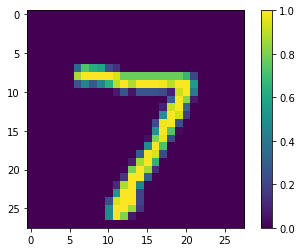

In [73]:
plt.imshow(x_test[0, :, :])
plt.colorbar()

## model

In [74]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [75]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn,
              optimizer='adam',
              metrics=['accuracy'])

In [76]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2546 - accuracy: 0.9277
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1112 - accuracy: 0.9666
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0776 - accuracy: 0.9763
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0574 - accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0449 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0359 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0283 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0182 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.015

In [77]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 763us/step - loss: 0.0801 - accuracy: 0.9793


[0.08006364107131958, 0.9793000221252441]

In [78]:
pred = model(x_test[5:6])

In [79]:
pred

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ -9.586887 ,  10.605701 ,  -3.138191 ,  -6.900755 ,  -3.9547179,
        -16.105425 , -14.444828 ,   0.7902588,  -4.2169943,  -9.496245 ]],
      dtype=float32)>

In [80]:
np.argmax(pred[0])

1